# Cars_Price_EDA

## Problem
Predicting the best equation for Sell Price for the car using the any of available datasets

### Steps

1. Importing Libraries
2. Importing, reading and understanding Dataset
3. Data Description
    - Looking for shape, columns, info, describe
4. Encoding Categorical data
5. Exploratory Data Analysis
    - Univariate Analysis 
    - Bivariate Analysis
    - Multivariate Analysis

### 1. Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Impring Libraries to ignore unwanted warnings

import warnings 
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2. Importing, Reading and Understanding Dataset

In [4]:
# Importing Dataset
car_df = pd.read_csv('Car details v3.csv')

# Reading first few records of our Dataset
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Reading last few records of our Dataset

car_df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


### 3. Data Description

In [6]:
# looking for shape of our dataset
car_df.shape

(8128, 13)

In [7]:
# Looking for columns fo our dataset
car_df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
# looking for brief information of our dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
# looking for short statistical description of numerical features of our dataset
car_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### 4. Encoding Categorical data

#### Company name

In [10]:
car_df.name.value_counts().head()

Maruti Swift Dzire VDI        129
Maruti Alto 800 LXI            82
Maruti Alto LXi                71
BMW X4 M Sport X xDrive20d     62
Maruti Swift VDI               61
Name: name, dtype: int64

In [11]:
# Creating new columns for company name
car_df['CName'] = car_df.name.apply(lambda x:x.split(' ')[0])

In [12]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,CName
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [13]:
car_df.CName.value_counts(normalize=True)

Maruti           0.301181
Hyundai          0.174090
Mahindra         0.094980
Tata             0.090305
Toyota           0.060039
Honda            0.057456
Ford             0.048844
Chevrolet        0.028297
Renault          0.028051
Volkswagen       0.022884
BMW              0.014764
Skoda            0.012918
Nissan           0.009966
Jaguar           0.008735
Volvo            0.008243
Datsun           0.007997
Mercedes-Benz    0.006644
Fiat             0.005782
Audi             0.004921
Lexus            0.004183
Jeep             0.003814
Mitsubishi       0.001722
Land             0.000738
Force            0.000738
Isuzu            0.000615
Ambassador       0.000492
Kia              0.000492
MG               0.000369
Daewoo           0.000369
Ashok            0.000123
Opel             0.000123
Peugeot          0.000123
Name: CName, dtype: float64

###### mileage

In [14]:
#car_df['mileage'] = car_df.mileage.apply(lambda x:float(x.split(' ')[0]))

car_df[car_df.mileage.apply(lambda x:isinstance(x, float))==True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,CName
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,Maruti
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,Fiat
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,Tata
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,Maruti
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,Maruti
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,NaN,NaN,NaN,NaN,BMW
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,Toyota
206,Maruti Omni E 8 Str STD,2003,40000,90000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,Maruti
228,Maruti Swift 1.3 VXi,2008,130000,120000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,Maruti
252,Tata Indica DLS,2005,75000,110000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN,Tata


In [15]:
# Finding mode of the Mileage column
car_df.mileage.mode()[0]

'18.9 kmpl'

In [16]:
# Filling Nans with the mode value
car_df.mileage = car_df.mileage.fillna(car_df.mileage.mode()[0])

In [17]:
car_df.mileage.isnull().sum()

0

In [18]:
car_df.mileage = car_df.mileage.apply(lambda x:x.split(' ')[0])
car_df.mileage.head()

0     23.4
1    21.14
2     17.7
3     23.0
4     16.1
Name: mileage, dtype: object

In [19]:
# converting it into float datatype
car_df.mileage = car_df.mileage.astype(float)

###### engine

In [20]:
#car_df['engine'] = car_df.engine.apply(lambda x:float(x.split(' ')[0]))

car_df[car_df.engine.apply(lambda x:isinstance(x, float))==True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,CName
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,18.9,NaN,NaN,NaN,NaN,Maruti
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,18.9,NaN,NaN,NaN,NaN,Fiat
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,18.9,NaN,NaN,NaN,NaN,Tata
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,18.9,NaN,NaN,NaN,NaN,Maruti
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,18.9,NaN,NaN,NaN,NaN,Maruti
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,18.9,NaN,NaN,NaN,NaN,BMW
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,18.9,NaN,NaN,NaN,NaN,Toyota
206,Maruti Omni E 8 Str STD,2003,40000,90000,Petrol,Individual,Manual,Second Owner,18.9,NaN,NaN,NaN,NaN,Maruti
228,Maruti Swift 1.3 VXi,2008,130000,120000,Petrol,Individual,Manual,Second Owner,18.9,NaN,NaN,NaN,NaN,Maruti
252,Tata Indica DLS,2005,75000,110000,Diesel,Individual,Manual,Second Owner,18.9,NaN,NaN,NaN,NaN,Tata


In [21]:
# Finding mode of the engine column
car_df.engine.mode()[0]

'1248 CC'

In [22]:
# Filling Nans with the mode value
car_df.engine = car_df.engine.fillna(car_df.engine.mode()[0])

In [23]:
car_df.engine.isnull().sum()

0

In [24]:
car_df.engine = car_df.engine.apply(lambda x:x.split(' ')[0])
car_df.engine.head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [25]:
# converting it into int datatype

car_df.engine = car_df.engine.astype(int)

###### max_power

In [26]:
#car_df['max_power'] = car_df.max_power.apply(lambda x:float(x.split(' ')[0]))

car_df[car_df.max_power.apply(lambda x:isinstance(x, float))==True]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,CName
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,18.9,1248,NaN,NaN,NaN,Maruti
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,18.9,1248,NaN,NaN,NaN,Fiat
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,18.9,1248,NaN,NaN,NaN,Tata
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,18.9,1248,NaN,NaN,NaN,Maruti
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,18.9,1248,NaN,NaN,NaN,Maruti
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,18.9,1248,NaN,NaN,NaN,BMW
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,18.9,1248,NaN,NaN,NaN,Toyota
206,Maruti Omni E 8 Str STD,2003,40000,90000,Petrol,Individual,Manual,Second Owner,18.9,1248,NaN,NaN,NaN,Maruti
228,Maruti Swift 1.3 VXi,2008,130000,120000,Petrol,Individual,Manual,Second Owner,18.9,1248,NaN,NaN,NaN,Maruti
252,Tata Indica DLS,2005,75000,110000,Diesel,Individual,Manual,Second Owner,18.9,1248,NaN,NaN,NaN,Tata


In [27]:
# Finding mode of the max_power column
car_df.max_power.mode()[0]

'74 bhp'

In [28]:
# Filling Nans with the mode value
car_df.max_power = car_df.max_power.fillna(car_df.max_power.mode()[0])

In [29]:
car_df.max_power.isnull().sum()

0

In [30]:
car_df.max_power = car_df.max_power.apply(lambda x:x.split(' ')[0])
car_df.max_power.head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [31]:
car_df[car_df.max_power==""]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,CName
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796,,NaN,8.0,Maruti


In [32]:
# This dataset has a blank input in max_power like "" only, so im going to replace it with 0
car_df.max_power = car_df.max_power.replace("", "0")

# now conveting it into float datatype
car_df.max_power = car_df.max_power.astype(float) 

###### torque

In [33]:
# Droping torque Columns as it is badly messed data
car_df = car_df.drop('torque', axis=1)

In [34]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,CName
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,Maruti


###### seats

In [35]:
car_df.seats.isnull().sum()

221

In [36]:
# Finding mode of the seats column
car_df.seats.mode()[0]

5.0

In [37]:
# Filling Nans with the mode value
car_df.seats = car_df.seats.fillna(car_df.seats.mode()[0])

In [38]:
car_df.seats.isnull().sum()

0

In [39]:
car_df.seats.value_counts()

5.0     6475
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [40]:
car_df.seats = car_df.seats.astype(int)

### 5. Exploratory Data Analysis

#### Univariate Analysis 

<AxesSubplot:>

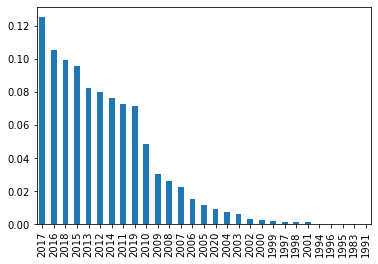

In [41]:
# Different years and their percentage count is this dataset
car_df.year.value_counts(normalize=True).plot.bar()

###### Infers -
- We have a wide range of car's models year
- Most of the cars is of erlier years, so, they must be higher is selling price

<AxesSubplot:>

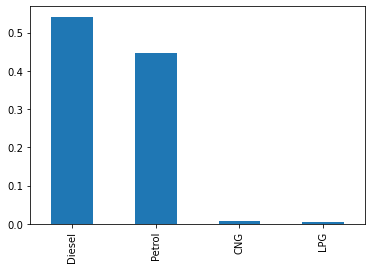

In [42]:
# Types of fuel and their percentage count is this dataset

car_df.fuel.value_counts(normalize=True).plot.bar()

<AxesSubplot:>

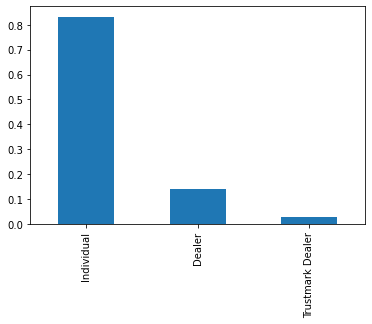

In [43]:
# Types of seller_type and their percentage count is this dataset

car_df.seller_type.value_counts(normalize=True).plot.bar()

<AxesSubplot:>

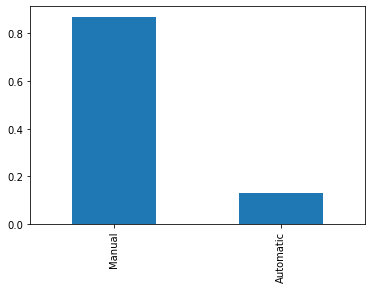

In [44]:
# Types of transmission and their percentage count is this dataset

car_df.transmission.value_counts(normalize=True).plot.bar()

<AxesSubplot:>

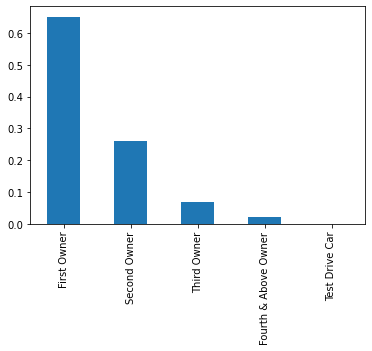

In [45]:
# Types of Owners and their percentage count is this dataset
car_df.owner.value_counts(normalize=True).plot.bar()

<AxesSubplot:>

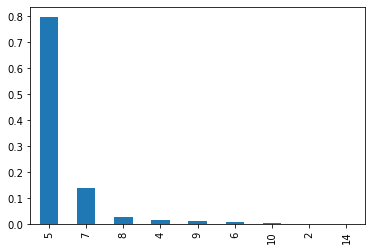

In [46]:
# Types of seat and their percentage count is this dataset
car_df.seats.value_counts(normalize=True).plot.bar()

###### km_driven

<AxesSubplot:xlabel='km_driven'>

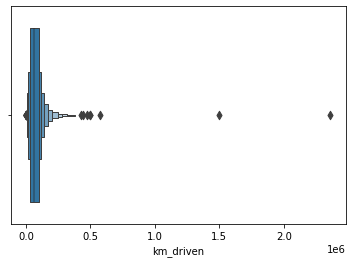

In [47]:
# Boxxplot for km_driven to see the distribbution of the km_driven
sns.boxenplot(car_df.km_driven)

In [48]:
# Checking the spread of the km_driven 

car_df.km_driven.quantile([0.2,0.25,0.5, 0.7, 0.9, 0.95, 0.99])

0.20     29000.0
0.25     35000.0
0.50     60000.0
0.70     90000.0
0.90    120000.0
0.95    150000.0
0.99    225000.0
Name: km_driven, dtype: float64

#### Bivariate Analysis

##### Selling_price vs year

In [49]:
# Plotting barplot for analysisng effect of model year on selling price of the car

car_price = car_df.groupby(by='year')['selling_price'].sum()
car_price.head()

###### Infers-
#- It shows wrong information, according to me the recent models should be of higher price. 
#- 1 of the major cause may be the number of cars to be sell are less.

car_Nos = car_df.groupby(by='year')['selling_price'].count()
car_Nos.head()

###### Infers - 
#- yes, as th number of cars from recent year are less hence sum of their price is also less.


# This is to list down the average selling price of per cars in each year 
price_arr = np.array(car_price)
nos_arr = np.array(car_Nos)
pd.DataFrame((price_arr/nos_arr)/100000)

,0
0,3.000000
1,0.550000
2,0.880000
3,1.075000
4,0.816667
5,0.901817
6,0.731000
7,0.758333
8,0.930415
9,0.484983


###### Infers-
- This shows the average seling price of each cars are higher for recent's models
- It shows very generic facts 

##### Km_driven vs selling_price

<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>

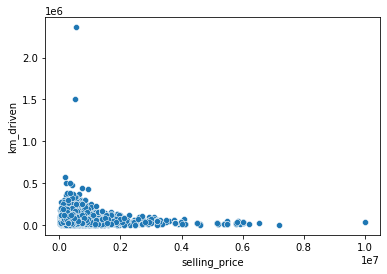

In [50]:
# plotting scatter plots to visualise the effect of km_driven on selling_price

sns.scatterplot(y='km_driven', x='selling_price', data=car_df)

###### Infers-
- I was thinking there should be higher price for lesser km_driven but, 
- I cannot see any strong relationship between them

###### fuel vs Selling_Price

<AxesSubplot:xlabel='fuel'>

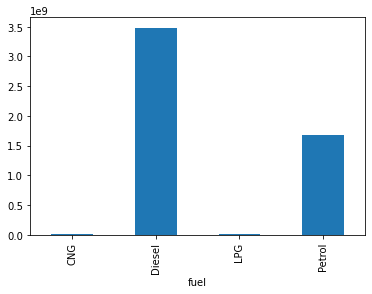

In [51]:
# Ploting bar plot the effect of fuel type on Selling Price
car_df.groupby('fuel')['selling_price'].sum().plot.bar()

###### Infers-
- It may again baised as the number of cars for different fuel is differet
- So, i should plot a price for average price for each selling type.

<AxesSubplot:xlabel='fuel'>

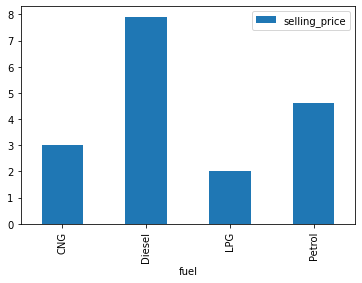

In [52]:
# getting car price for each fuel type
car_price = car_df.groupby(by='fuel')['selling_price'].sum()
car_price.head()

# getting number of cars for each fuel type
car_fuel = car_df.groupby(by='fuel')['selling_price'].count()
car_fuel.head()

# This is to list down the average selling price of per fuel type in each year 
price_arr = np.array(car_price)
fuel_arr = np.array(car_fuel)
pd.DataFrame((price_arr/car_fuel)/100000).plot.bar() # will show selling price in lacs

###### Infers-
- This shows that the average price of diesel engine cars are highest.
- LPG cars are at lowest cost

###### seller_type vs selling_price

In [53]:
car_df.seller_type.value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [54]:
car_df.groupby(by='seller_type')['selling_price'].sum()

seller_type
Dealer              1625373957
Individual          3373265296
Trustmark Dealer     189234000
Name: selling_price, dtype: int64

###### Infers-
- The above shows that most of the cars would be sold by Individuals and very few will go for trustmark Dealer to sell their cars.
- So,To check who charges most we need to plot charge per cars by each seller type

<AxesSubplot:>

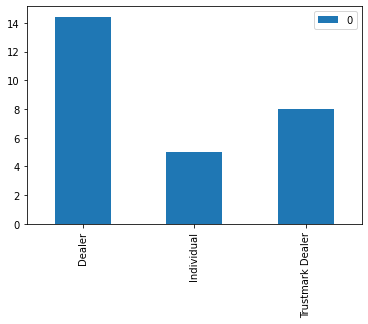

In [55]:
# getting car count for each seller_type type
seller_count = car_df.seller_type.value_counts()

# getting number of cars price for each seller_type type
seller_price = car_df.groupby(by='seller_type')['selling_price'].sum()

# This is to list down the average selling price of per seller_type
price_arr = np.array(seller_price)
fuel_arr = np.array(seller_count)
pd.DataFrame((seller_price/seller_count)/100000).plot.bar() # will show selling price in lacs

###### Infers-
- This shows that Dealer charges really really huge amount, almost double than others
- So, next time, I'll not going to deal with any dealer in future 

###### transmission vs selling_price

In [56]:
# to find the sum of selling price for each type of transmission
car_df.groupby(by='transmission')['selling_price'].sum()

transmission
Automatic    1964368984
Manual       3223504269
Name: selling_price, dtype: int64

In [57]:
# to find the counts of cars for each type of transmission
car_df.groupby(by='transmission')['selling_price'].count()

transmission
Automatic    1050
Manual       7078
Name: selling_price, dtype: int64

<AxesSubplot:>

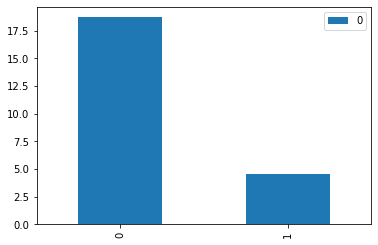

In [58]:
# getting car count for each transmission type
transmission_count = car_df.groupby(by='transmission')['selling_price'].count()

# getting number of cars price for each transmission type
transmission_price = car_df.groupby(by='transmission')['selling_price'].sum()

# This is to list down the average selling price of transmission
price_arr = np.array(transmission_price)
count_arr = np.array(transmission_count)
pd.DataFrame((price_arr/count_arr)/100000).plot.bar() # will show selling price in lacs

###### infers-
- This shows that Automatic cars has around 18 lacs per car
- And Manual traansmission car has lesser price, around 4lacs.

###### owner vs selling_price

In [59]:
# to find the sum of selling price for each owners type
car_df.groupby(by='owner')['selling_price'].sum()

owner
First Owner             4141744046
Fourth & Above Owner      39291492
Second Owner             827190206
Test Drive Car            22019000
Third Owner              157628509
Name: selling_price, dtype: int64

In [60]:
# to find the counts of car for each owners type
car_df.groupby(by='owner')['selling_price'].count()

owner
First Owner             5289
Fourth & Above Owner     174
Second Owner            2105
Test Drive Car             5
Third Owner              555
Name: selling_price, dtype: int64

<AxesSubplot:>

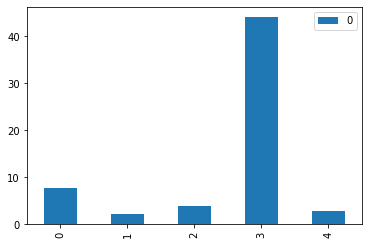

In [61]:
# getting car count for each owner type
owner_count = car_df.groupby(by='owner')['selling_price'].count()

# getting number of cars price for each owner type
owner_price = car_df.groupby(by='owner')['selling_price'].sum()

# This is to list down the average selling price of owner
price_arr = np.array(owner_price)
count_arr = np.array(owner_count)
pd.DataFrame((price_arr/count_arr)/100000).plot.bar() # will show selling price in lacs

###### Infers-
- Wow!! It means, Test Drive Cars are most costly about 44 lacs per cars.
- As usual, the Fist owner cars are 2nd most coslty (around 7 lacs/car) and then Second Owner (around 3 lacs/car) cars comes.

###### mileage vs selling_price

<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

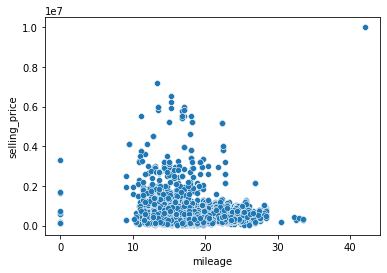

In [62]:
# Plotting scatter plot for checking the effect of mileage over selling_price 
sns.scatterplot(x='mileage', y='selling_price', data=car_df)

###### Infers-
- There is no strong relation between mileage and selling_price

###### engine vs selling_price

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

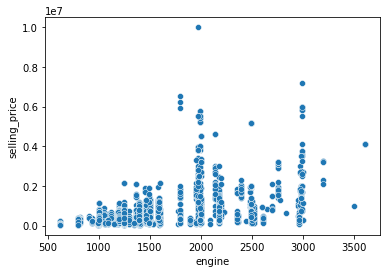

In [63]:
# Plotting scatter plot for checking the effect of engine over selling_price 
sns.scatterplot(x='engine', y='selling_price', data=car_df)

###### Infers-
- There is no strong relation

###### max_power vs selling_price

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

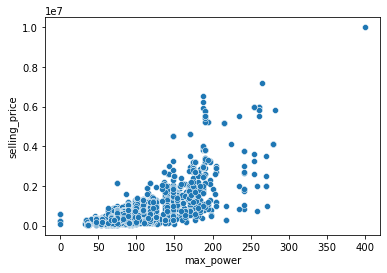

In [64]:
# Plotting scatter plot for checking the effect of max_power over selling_price 
sns.scatterplot(x='max_power', y='selling_price', data=car_df)

###### seats vs selling_price

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

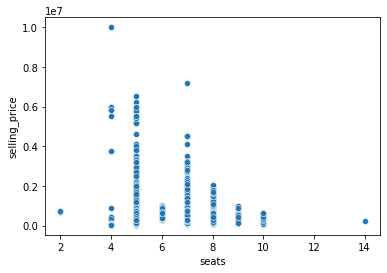

In [65]:
# Plotting scatter plot for checking the effect of number of seats over selling_price 
sns.scatterplot(x='seats', y='selling_price', data=car_df)

Text(0.5, 1.0, 'seats vs selling_price')

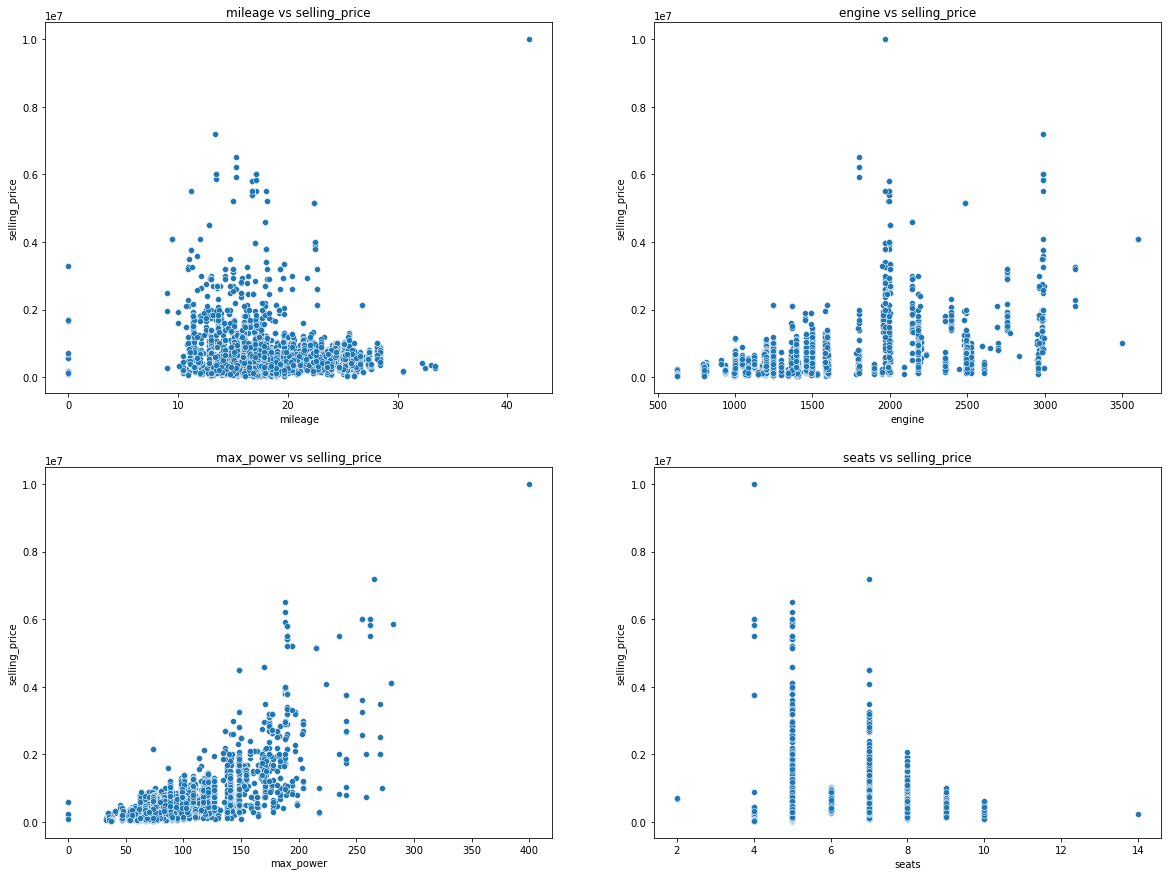

In [66]:
# Plotting scatter plot for checking the effect of mileage over selling_price 
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.scatterplot(x='mileage', y='selling_price', data=car_df)
plt.title("mileage vs selling_price")

# Plotting scatter plot for checking the effect of engine over selling_price 
plt.subplot(2,2,2)
sns.scatterplot(x='engine', y='selling_price', data=car_df)
plt.title('engine vs selling_price')

# Plotting scatter plot for checking the effect of max_power over selling_price 
plt.subplot(2,2,3)
sns.scatterplot(x='max_power', y='selling_price', data=car_df)
plt.title('max_power vs selling_price')

# Plotting scatter plot for checking the effect of number of seats over selling_price 
plt.subplot(2,2,4)
sns.scatterplot(x='seats', y='selling_price', data=car_df)
plt.title('seats vs selling_price')

###### Infers-
- I cannot see any strong relation 

#### Multivariate Analysis

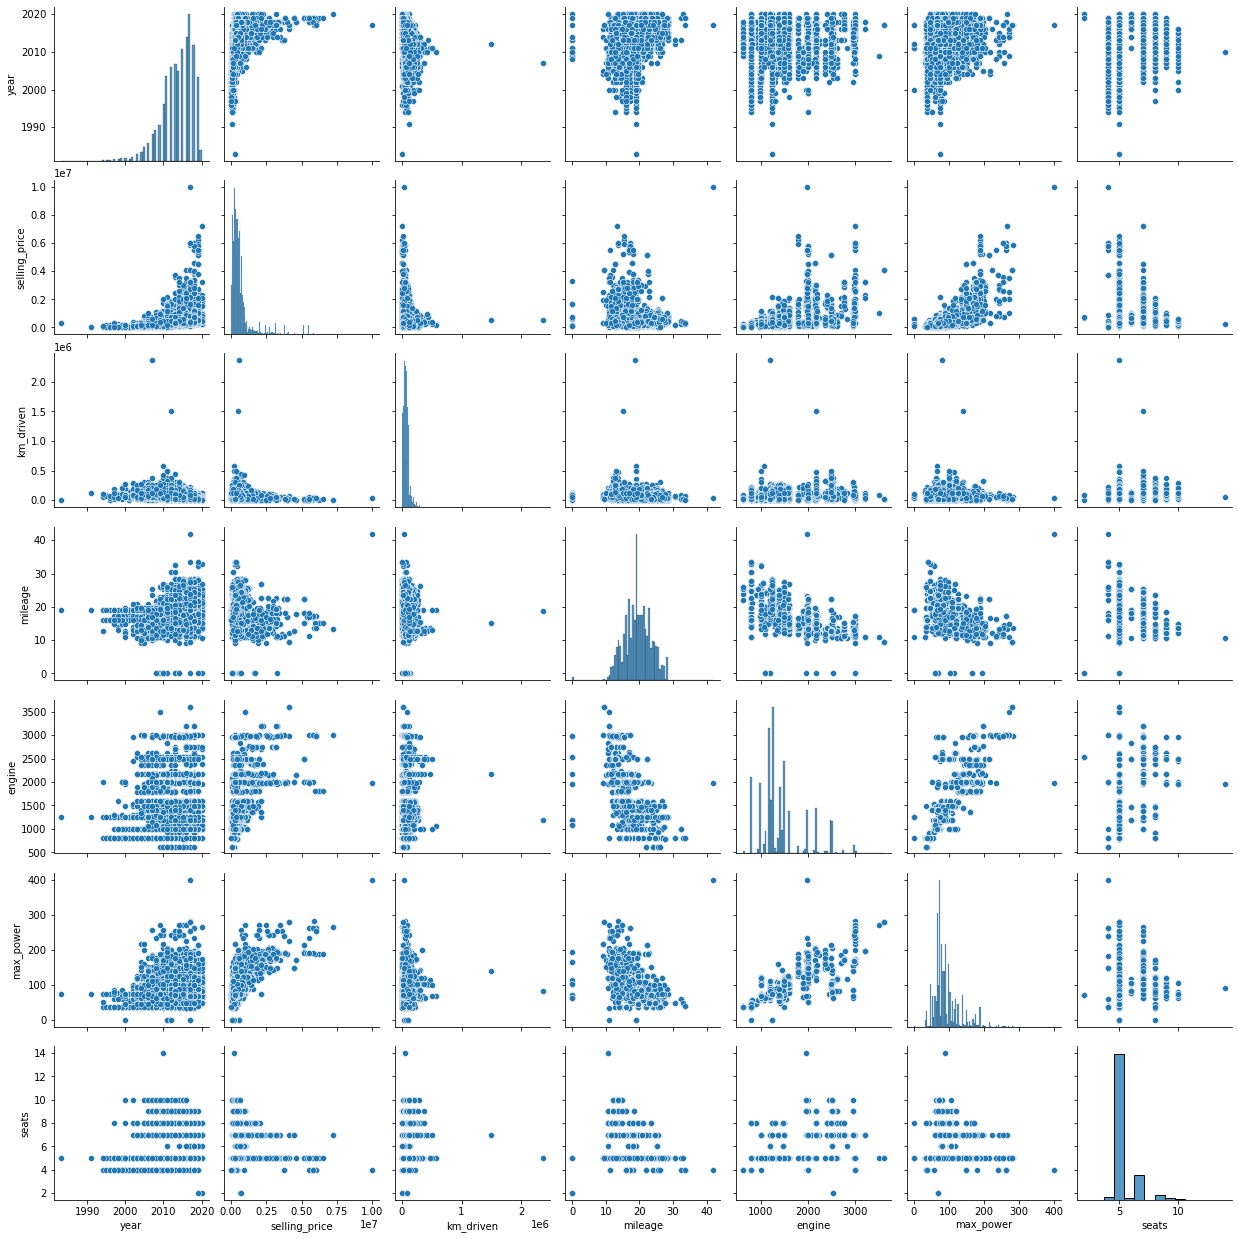

In [67]:
sns.pairplot(car_df)

In [68]:
# creating pivot table for Selling price with respect to all companies for all fuel type.
pd.pivot_table(data=car_df, index='CName', columns='fuel', 
                     values='selling_price', aggfunc=np.sum)

fuel,CNG,Diesel,LPG,Petrol
CName,,,,
Ambassador,NaN,496000.0,NaN,NaN
Ashok,NaN,300000.0,NaN,NaN
Audi,NaN,83398998.0,NaN,21088999.0
BMW,NaN,487215000.0,NaN,5975000.0
Chevrolet,NaN,45064996.0,400000.0,17524524.0
Daewoo,NaN,NaN,NaN,231000.0
Datsun,NaN,NaN,NaN,20448997.0
Fiat,NaN,12264998.0,NaN,1650000.0
Force,NaN,5325000.0,NaN,NaN


###### Infers-
- This means only Tata, Maruti and Hyundai has CNG cars, silmilarly LPG is used in Chevrolet, Maruti and Hyundai.
- Only Maruti and Hyundai has cars of all fuel types.

In [69]:
# creating pivot table for Selling price with respect to all companies for all fuel type.
pd.pivot_table(data=car_df, index='CName', columns='seller_type', 
                     values='selling_price', aggfunc=np.mean)

seller_type,Dealer,Individual,Trustmark Dealer
CName,,,
Ambassador,NaN,1.240000e+05,NaN
Ashok,NaN,3.000000e+05,NaN
Audi,3.310136e+06,1.759167e+06,NaN
BMW,4.652447e+06,2.148462e+06,NaN
Chevrolet,3.388000e+05,2.709160e+05,NaN
Daewoo,NaN,7.700000e+04,NaN
Datsun,2.978571e+05,3.166206e+05,NaN
Fiat,3.075000e+05,2.955555e+05,NaN
Force,9.100000e+05,8.762500e+05,NaN


In [70]:
# creating pivot table for Selling price with respect to all companies for all max_power.
pd.pivot_table(data=car_df, index='CName', columns='max_power', 
                     values='selling_price', aggfunc=np.mean)

max_power,0.000,32.800,34.200,35.000,35.500,37.000,37.480,37.500,38.000,38.400,40.300,45.000,46.300,47.000,47.300,48.210,52.000,52.800,53.000,53.260,53.300,53.500,53.640,55.200,55.230,56.300,57.000,57.500,57.600,58.000,58.160,58.200,58.300,58.330,60.000,60.200,61.700,62.000,62.100,63.000,63.100,63.120,64.000,64.080,64.100,64.400,64.900,65.000,65.300,66.000,66.100,66.600,67.000,67.040,67.050,67.060,67.100,68.000,68.050,68.070,68.100,68.400,69.000,69.010,70.000,71.000,71.010,72.000,72.400,73.000,73.740,73.750,73.800,73.900,73.940,73.970,74.000,74.020,74.900,74.960,75.000,76.000,76.800,76.900,77.000,78.000,78.800,78.900,79.400,80.000,80.800,80.840,80.900,81.800,81.830,81.860,82.000,82.400,82.500,82.850,82.900,83.000,83.100,83.110,83.140,83.800,83.810,83.830,84.000,84.480,84.800,85.000,85.800,86.000,86.700,86.790,86.800,87.200,88.000,88.200,88.500,88.700,88.730,88.760,88.800,89.750,89.840,90.000,91.100,91.200,91.700,91.720,92.000,92.700,93.700,93.870,94.000,94.680,94.930,95.000,97.700,97.900,98.590,98.600,98.630,98.790,98.820,98.960,98.970,99.000,99.230,99.600,100.000,100.500,100.570,100.600,101.000,102.000,102.500,103.000,103.200,103.250,103.260,103.300,103.500,103.520,103.600,104.000,104.500,104.550,104.680,105.000,105.300,105.500,106.000,108.450,108.495,108.500,108.600,108.620,110.000,110.400,110.500,112.000,112.200,113.400,113.420,115.000,116.300,116.400,116.600,116.900,117.300,117.600,118.000,118.300,118.350,120.000,120.690,120.700,121.000,121.300,121.310,121.360,121.400,122.400,123.370,123.700,125.000,126.200,126.240,126.300,126.320,127.000,130.000,132.000,134.000,134.100,135.100,136.000,138.000,138.030,138.080,138.100,139.010,139.460,140.000,141.000,141.100,142.000,143.000,144.000,147.500,147.510,147.800,147.900,147.940,148.000,148.310,149.500,150.000,152.000,152.870,153.860,155.000,156.000,157.700,157.750,158.000,158.800,160.000,160.770,161.000,162.000,163.200,163.700,164.700,165.000,167.600,167.620,167.670,168.500,168.700,169.000,170.000,170.300,170.630,171.000,171.500,174.330,174.500,174.570,175.000,175.560,177.000,177.460,177.500,177.600,178.000,179.500,181.000,181.040,183.000,184.000,186.000,187.400,187.700,187.740,188.000,189.000,189.300,190.000,194.000,194.300,194.400,197.000,197.200,198.250,198.500,201.100,203.000,203.200,204.000,214.560,218.000,224.000,235.000,241.000,241.400,254.790,254.800,258.000,261.400,265.000,270.900,272.000,280.000,282.000,400.000
CName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ambassador,NaN,NaN,NaN,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140333.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [71]:
# creating pivot table for Selling price with respect to all companies for all seats Numbers.
pd.pivot_table(data=car_df, index='CName', columns='seats', 
                     values='selling_price', aggfunc=np.mean)

seats,2,4,5,6,7,8,9,10,14
CName,,,,,,,,,
Ambassador,NaN,NaN,1.240000e+05,NaN,NaN,NaN,NaN,NaN,NaN
Ashok,NaN,NaN,NaN,NaN,NaN,300000.000000,NaN,NaN,NaN
Audi,NaN,NaN,2.747147e+06,NaN,1.847500e+06,NaN,NaN,NaN,NaN
BMW,NaN,4.840000e+06,4.022091e+06,NaN,7.200000e+06,NaN,NaN,NaN,NaN
Chevrolet,NaN,4.366667e+05,2.111259e+05,NaN,4.611600e+05,413750.000000,519999.900000,425999.846154,NaN
Daewoo,NaN,NaN,7.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN
Datsun,NaN,NaN,3.015490e+05,NaN,3.621428e+05,NaN,NaN,NaN,NaN
Fiat,NaN,NaN,2.960638e+05,NaN,NaN,NaN,NaN,NaN,NaN
Force,NaN,NaN,9.100000e+05,NaN,8.762500e+05,NaN,NaN,NaN,NaN


In [72]:
# creating pivot table for Selling price with respect to all companies for all engine.
pd.pivot_table(data=car_df, index='CName', columns='engine', 
                     values='selling_price', aggfunc=np.mean)

engine,624,793,796,799,814,909,936,993,995,998,999,1047,1061,1086,1120,1150,1172,1186,1193,1194,1196,1197,1198,1199,1248,1298,1299,1339,1341,1343,1364,1368,1373,1388,1390,1396,1399,1405,1422,1451,1461,1462,1489,1493,1495,1496,1497,1498,1499,1527,1582,1586,1590,1591,1595,1596,1597,1598,1599,1781,1794,1795,1796,1797,1798,1799,1896,1948,1950,1956,1968,1969,1984,1991,1994,1995,1997,1998,1999,2092,2143,2148,2179,2197,2198,2199,2200,2231,2354,2359,2362,2393,2446,2477,2487,2489,2494,2496,2497,2498,2499,2523,2596,2609,2650,2694,2696,2755,2776,2835,2953,2956,2967,2982,2987,2993,2997,2999,3198,3498,3604
CName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ambassador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.403333e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ashok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730000.0,NaN,NaN,NaN,NaN,5089749.75,NaN,NaN,NaN,NaN,NaN,2.535154e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.942778e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.520000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.352969e+06,NaN,1.981250e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,975000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.264615e+06,NaN,NaN,NaN,NaN,NaN
Chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,185583.333333,NaN,123175.0,NaN,NaN,NaN,NaN,NaN,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231133.311111,3.632000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237500.000000,190000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.275833e+05,409999.0,NaN,NaN,5.816667e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,683500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.712173e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1295000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daewoo,NaN,NaN,77000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Datsun,NaN,NaN,NaN,252999.923077,NaN,NaN,NaN,NaN,NaN,NaN,300666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [73]:
# creating pivot table for Selling price with respect to all companies for all mileage.
pd.pivot_table(data=car_df, columns='CName',  index='mileage', 
                     values='selling_price', aggfunc=np.mean)

CName,Ambassador,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
mileage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380000e+05,NaN,NaN,NaN,NaN,1650000.0,NaN,NaN,7.005000e+05,NaN,2.233333e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+05,NaN,5.745000e+05,NaN
9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.800000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.225000e+06
9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.100000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.762500e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.250000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.591874e+05,NaN,NaN,6.250000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+05,NaN,NaN,NaN
10.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+06,NaN,NaN
10.80,NaN,NaN,NaN,9.750000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# creating pivot table for Selling price with respect to all companies for all mileage.
pd.pivot_table(data=car_df, columns='seller_type',  index='owner', 
                     values='selling_price', aggfunc=np.mean)

seller_type,Dealer,Individual,Trustmark Dealer
owner,,,
First Owner,1.511422e+06,599344.170354,812729.064039
Fourth & Above Owner,NaN,225813.172414,NaN
Second Owner,6.418383e+05,374758.342625,734848.484848
Test Drive Car,4.403800e+06,NaN,NaN
Third Owner,2.962500e+05,283926.513612,NaN


###### Infers-
- First and second owner try to sell the car by all means, i.e. Dealer, Individual, Trustmark Dealer
- Test Drive Cars are sold by Dealer only, and Fourth & Above Owner cars are sold by Individual. 

In [75]:
car_df.selling_price.max()

10000000

In [76]:
car_df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.00000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.404678,1452.89813,91.043279,5.405389
std,4.044249,8.062534e+05,5.655055e+04,3.982769,498.19672,35.469265,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.00000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.00000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.100000,1248.00000,81.860000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.00000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.00000,400.000000,14.000000


### Conclusion-
    1.  There are 32 differnt cars companies, for instance, Maruti, Hyundai, Tata, Toyota etc.
    2.  In this dataset, almost 30% of the cars are Maruti's cars only and then 17% of the cars are of Hyundai and so on. 
    3.  Almost 90%  of the cars are of new model (from 2010 to 2017 models)
    4.  We have as old as 1983's cars and as new as 2017's cars as well.
    5.  The mileage is of range from 0 to 42 kmpl
    6.  The range of engine power is from 624cc to 3604cc
    7.  The range of maximum Power is 0bhp to 400bhp
    8.  and the range of seats is from 2 to 14 seats in the car
    9.  The range of selling price is from Rs.29999 to Rs.10000000.
    10. We have a wide range of car's models year
    11. Most of the cars is of erlier years, so, they must be higher is selling price.
    12. This dataset shows the average seling price of each cars are higher for recent's models
    13. I was thinking there should be higher price for lesser km_driven but, I cannot see any strong relationship between them
    14. The average price of diesel engine cars are highest. LPG cars are at lowest cost.
    15. Most of the cars would be sold by Individuals and very few will go for trustmark Dealer to sell their cars.
    16. The Dealer charges really really huge amount, almost double than others. So, next time, I'll not going to deal with any dealer in future.
    17. The Automatic cars has around 18 lacs per car and Manual transmission cars has lesser price, around 4lacs.
    18. Test Drive Cars are most costly (about 44 lacs per cars).
    19. As usual, the Fist owner cars are 2nd most coslty (around 7 lacs/car) and then Second Owner (around 3 lacs/car) cars comes.
    20. Only Tata, Maruti and Hyundai has CNG cars, silmilarly LPG is used in Chevrolet, Maruti and Hyundai cars. Only Maruti and Hyundai has cars of all fuel types.